# Import

In [192]:
from numpy.random import seed
seed(888)
from tensorflow.random import set_seed
set_seed(404)
import os
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import cifar10
from IPython.display import display
from keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import Input
from keras.api.callbacks import TensorBoard 
from sklearn.metrics import confusion_matrix
from itertools import product

from time import strftime

%matplotlib inline

# CONSTANT

In [ ]:
LOG_DIR = "Tensorboard/"
IMAGE_WIDTH = 32
IMAGE_HIGHT = 32
IMAGE_PIXELS = IMAGE_HIGHT*IMAGE_WIDTH
COLOR_CHANNELS = 3
TOTAL_INPUT = IMAGE_PIXELS * COLOR_CHANNELS
VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000
OUTPUT_UNITS = 128
LABLES = {
0 : "Airplane",
1 : "Automobile",
2 : "Bird",
3 : "Cat",
4 : "Deer",
5 : "Dog",
6 : "Frog",
7 : "Horse",
8 : "Ship",
9 : "Truck",
}

# Get Data

In [ ]:
(x_train_all, y_train_all), (x_test_all, y_test_all) = cifar10.load_data()

In [ ]:
x_train_all[0]

In [ ]:
pic = array_to_img(x_train_all[7])
display(pic)

In [ ]:
y_train_all.shape

In [ ]:
II = y_train_all[7][0]
LABLES[II]

In [ ]:
plt.figure(figsize=(15,5))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_all[i])
    plt.xlabel(LABLES[y_train_all[i][0]], fontsize=10)
plt.show()

In [ ]:
LABLES[y_train_all[4][0]]

In [ ]:
x_train_all[0][0][0]

In [ ]:
x_train_all, x_test_all = x_train_all / 255.0, x_test_all / 255.0

In [ ]:
x_train_all[0][0][0]

In [ ]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUT)

In [ ]:
x_train_all.shape

In [153]:
x_test = x_test_all.reshape(x_test_all.shape[0], TOTAL_INPUT)

In [157]:
y_test = y_test_all

In [154]:
x_test.shape

(10000, 3072)

### Create Validation Data.

In [ ]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]

In [148]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]
print(x_train.shape)
print(y_train.shape)

(40000, 3072)
(40000, 1)


### Create a Small Dataset.(For Illustration.)

In [ ]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

# Define the Nural Network using Keras.

In [128]:
model_1 = Sequential()
model_1.add(Input(shape=(TOTAL_INPUT,)))
model_1.add(Dense(units=128, activation="relu", name="M1_Hidden_1"))
model_1.add(Dense(units=64, activation="relu", name="M1_Hidden_2"))
model_1.add(Dense(units=16, activation="relu", name="M1_Hidden_3"))
model_1.add(Dense(units=10, activation="softmax", name="M1_Output"))
model_1.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy", 
                metrics=['accuracy'],
                )


In [129]:
model_2 = Sequential()
# model_2.add(Input(shape=(TOTAL_INPUT,)))
model_2.add(Dropout(rate=0.2, seed=42))
model_2.add(Dense(units=128, activation="relu", name="M2_Hidden_1"))
model_2.add(Dense(units=64, activation="relu", name="M2_Hidden_2"))
model_2.add(Dense(units=16, activation="relu", name="M2_Hidden_3"))
model_2.add(Dense(units=10, activation="softmax", name="M2_Output"))
model_2.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy", 
                metrics=['accuracy'],
                )


In [130]:
model_3 = Sequential()
# model_2.add(Input(shape=(TOTAL_INPUT,)))
model_3.add(Dropout(rate=0.2, seed=42))
model_3.add(Dense(units=128, activation="relu", name="M3_Hidden_1"))
model_3.add(Dropout(rate=0.25, seed=42))
model_3.add(Dense(units=64, activation="relu", name="M3_Hidden_2"))
model_3.add(Dense(units=16, activation="relu", name="M3_Hidden_3"))
model_3.add(Dense(units=10, activation="softmax", name="M3_Output"))
model_3.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy", 
                metrics=['accuracy'],
                )


In [82]:
type(model_1)

keras.src.models.sequential.Sequential

In [83]:
model_1.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ M1_Hidden_1 (Dense)             │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ M1_Hidden_2 (Dense)             │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ M1_Hidden_3 (Dense)             │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ M1_Output (Dense)               │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,810 (1.54 MB)

 Trainable params: 402,810 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

# TensorBoard (Visualising Learning)

In [ ]:
def get_tensorboard(model_name):
    folder_name = f"{model_name} as {strftime("%H %M")}"
    dir_paths = os.path.join(LOG_DIR, folder_name)
    try:
        os.makedirs(dir_paths)
    except OSError as error:
        pass
    else:
        print(f"Folder created {dir_paths}")
    return TensorBoard(log_dir=dir_paths)

# Fit the model.

In [ ]:
# %%time
# semples_per_batch = 1000
# nr_epochs = 150
# model_1.fit(
#     x=x_train_xs,
#     y=y_train_xs,
#     epochs=nr_epochs,
#     batch_size=semples_per_batch,
#     callbacks=[get_tensorboard("Model 1")],
#     verbose=2,
#     validation_data=(x_val, y_val),
# )

In [131]:
%%time
semples_per_batch = 1000
nr_epochs = 1000
model_1.fit(
    x=x_train,
    y=y_train,
    epochs=nr_epochs,
    batch_size=semples_per_batch,
    callbacks=[get_tensorboard("Model 1")],
    verbose=0,
    validation_data=(x_val, y_val),
)

Folder created Tensorboard/Model 1 as 13 30
CPU times: user 6min 20s, sys: 37.5 s, total: 6min 57s
Wall time: 6min 48s


In [132]:
%%time
semples_per_batch = 1000
nr_epochs = 1000
model_2.fit(
    x=x_train,
    y=y_train,
    epochs=nr_epochs,
    batch_size=semples_per_batch,
    callbacks=[get_tensorboard("Model 2")],
    verbose=0,
    validation_data=(x_val, y_val),
)

Folder created Tensorboard/Model 2 as 13 37
CPU times: user 7min 54s, sys: 45.8 s, total: 8min 40s
Wall time: 8min 18s


In [133]:
%%time
semples_per_batch = 1000
nr_epochs = 1000
model_3.fit(
    x=x_train,
    y=y_train,
    epochs=nr_epochs,
    batch_size=semples_per_batch,
    callbacks=[get_tensorboard("Model 3")],
    verbose=0,
    validation_data=(x_val, y_val),
)

Folder created Tensorboard/Model 3 as 13 45
CPU times: user 8min, sys: 46.8 s, total: 8min 47s
Wall time: 8min 15s


# Predictions on Indiviual Image.

In [88]:
x_val[0]

array([0.23137255, 0.24313725, 0.24705882, ..., 0.48235294, 0.36078431,
       0.28235294])

In [90]:
test = np.expand_dims(x_val[0], axis=0)
test.shape

(1, 3072)

In [100]:
np.set_printoptions(precision=3)

In [124]:
prediction = model_2.predict(test)
np.argmax(prediction, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([4])

In [135]:
pre_1 = model_1.predict(test)
pre_2 = model_2.predict(test)
pre_3 = model_3.predict(test)
print(pre_1)
print(pre_2)
print(pre_3)
print(np.argmax(pre_1, axis=1))
print(np.argmax(pre_2, axis=1))
print(np.argmax(pre_3, axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[4.698e-06 1.630e-08 3.874e-03 6.301e-03 3.122e-03 2.988e-03 9.836e-01
  1.346e-04 2.526e-08 1.718e-08]]
[[0.177 0.01  0.083 0.034 0.109 0.031 0.409 0.141 0.003 0.002]]
[[0.008 0.005 0.088 0.104 0.157 0.042 0.566 0.024 0.002 0.003]]
[6]
[6]
[6]


In [94]:
y_val[0]

array([6], dtype=uint8)

In [144]:
def predict_image(x,y,num:int=5):
    if num > len(x_val):
        raise ValueError("Not that much image.")
    for i in range(num):
        test = np.expand_dims(x[i], axis=0)
        pre_1 = model_1.predict(test, verbose=0)
        pre_2 = model_2.predict(test, verbose=0)
        pre_3 = model_3.predict(test, verbose=0)
        prediction_1 = np.argmax(pre_1, axis=1)
        prediction_2 = np.argmax(pre_2, axis=1)
        prediction_3 = np.argmax(pre_3, axis=1)
        print(f"Model 1 :- Image {i}, Actual {y[i]}, Prediction {prediction_1}")
        print(f"Model 2 :- Image {i}, Actual {y[i]}, Prediction {prediction_2}")
        print(f"Model 3 :- Image {i}, Actual {y[i]}, Prediction {prediction_3}\n")

In [158]:
predict_image(x_test, y_test, 10)

Model 1 :- Image 0, Actual [3], Prediction [8]
Model 2 :- Image 0, Actual [3], Prediction [3]
Model 3 :- Image 0, Actual [3], Prediction [4]

Model 1 :- Image 1, Actual [8], Prediction [8]
Model 2 :- Image 1, Actual [8], Prediction [8]
Model 3 :- Image 1, Actual [8], Prediction [1]

Model 1 :- Image 2, Actual [8], Prediction [8]
Model 2 :- Image 2, Actual [8], Prediction [8]
Model 3 :- Image 2, Actual [8], Prediction [8]

Model 1 :- Image 3, Actual [0], Prediction [4]
Model 2 :- Image 3, Actual [0], Prediction [0]
Model 3 :- Image 3, Actual [0], Prediction [8]

Model 1 :- Image 4, Actual [6], Prediction [4]
Model 2 :- Image 4, Actual [6], Prediction [4]
Model 3 :- Image 4, Actual [6], Prediction [4]

Model 1 :- Image 5, Actual [6], Prediction [2]
Model 2 :- Image 5, Actual [6], Prediction [6]
Model 3 :- Image 5, Actual [6], Prediction [6]

Model 1 :- Image 6, Actual [1], Prediction [3]
Model 2 :- Image 6, Actual [1], Prediction [1]
Model 3 :- Image 6, Actual [1], Prediction [0]

Model 

In [151]:
model_2.metrics_names

['loss', 'compile_metrics']

In [161]:
test_loss, test_compile_metrics = model_2.evaluate(x_test, y_test, verbose=0)
print(f"Loss :- {test_loss}")
print(f"Compile Metrics :- {test_compile_metrics}")

Loss :- 1.4291149377822876
Compile Metrics :- 0.5095000267028809


### Confusion Matrix

In [169]:
predict = np.argmax(model_2.predict(x_test, verbose=0), axis=1)
conf_matrix = confusion_matrix(y_true = y_test, y_pred = predict)

In [170]:
conf_matrix.shape

(10, 10)

In [171]:
print(conf_matrix)

[[583  32  50  27  19  15  30  38 160  46]
 [ 54 588  11  27   9  17  16  22  94 162]
 [ 89  16 423  65  97  88  98  77  29  18]
 [ 39  21  96 273  42 241 145  65  30  48]
 [ 63  10 174  50 360  60 125 115  31  12]
 [ 30   8  87 180  48 436  73  85  30  23]
 [ 11  11  93  81  80  58 609  27  19  11]
 [ 58  13  54  36  63  84  32 594  16  50]
 [100  72  12  24  12  26   9  13 678  54]
 [ 58 162  13  35   9  23  24  50  75 551]]


In [173]:
conf_matrix.max()

678

In [193]:
conf_matrix.min()
nr_conf_rows = conf_matrix.shape[0]
nr_conf_cols = conf_matrix.shape[1]

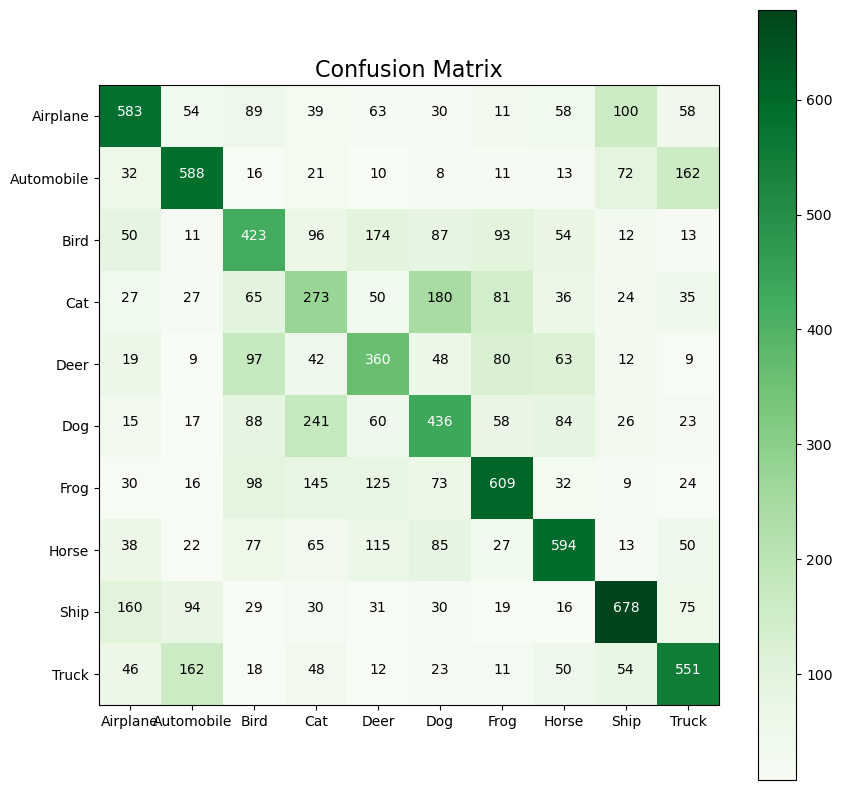

In [200]:
plt.figure(figsize=(10,10))
plt.imshow(conf_matrix, cmap=plt.cm.Greens)
plt.title("Confusion Matrix", fontsize=16)
tick_marks = np.arange(len(LABLES))
plt.yticks(tick_marks, LABLES.values())
plt.xticks(tick_marks, LABLES.values())
plt.colorbar()
for i,j in product(range(nr_conf_rows), range(nr_conf_cols)):
    plt.text(x=i, y=j,s=conf_matrix[i][j], horizontalalignment="center", color="white" if conf_matrix[i,j] > conf_matrix.max()/2 else "black")
    
plt.show()

In [206]:
true_true_conf_matrix = np.diag(conf_matrix)
recall_conf_matrix = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1) 
precision_conf_matrix = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0) 

In [207]:
print(recall_conf_matrix)
print(precision_conf_matrix)

[0.583 0.588 0.423 0.273 0.36  0.436 0.609 0.594 0.678 0.551]
[0.537 0.63  0.418 0.342 0.487 0.416 0.525 0.547 0.583 0.565]


In [209]:
average_recall_conf = np.mean(recall_conf_matrix)
average_precision_conf = np.mean(precision_conf_matrix)
print(f"Model 2 Recall Score :- {average_recall_conf:.2%}")
print(f"Model 2 Precision Score :- {average_precision_conf:.2%}")

Model 2 Recall Score :- 50.95%
Model 2 Precision Score :- 50.51%


In [210]:
f_score_conf_matrix = 2 * (average_precision_conf * average_recall_conf) / (average_precision_conf + average_recall_conf)
print(f"Model 2 F Score :- {f_score_conf_matrix:.2%}")

Model 2 F Score :- 50.73%
